#**TTI103 - Lógica de Programação**

#**Aula L14 - Estruturas de Repetição 02**

#**Exercício 01 - Divisores (Versão Inicial)**

Escreva um programa em Python que exiba todos os divisores de um número inteiro fornecido pelo usuário.

**Requisitos:**
* Valide os dados de entrada (*Sugestão:* pesquise sobre a estrutura `try-except`.)
* Os divisores do número fornecido devem ser armazenados em uma lista, em ordem crescente.
* Use a função `time` da biblioteca `time` para medir o tempo de processamento para a entrada 123456789.

In [2]:
# Exercício 01
from time import time

# Condições Iniciais
divisores = []

# Entrada de Dados
ok = False
while not ok:
    try:
        numero = int(input('Digite um número inteiro positivo: '))
        if numero > 0:
            ok = True
        else:
            print('ERRO - O número deve ser inteiro positivo!')
    except:
        print('ERRO - O número deve ser inteiro positivo!')

# Início da contagem do tempo de execução
inicio = time()
for teste in range( 1, numero + 1):
    if numero % teste == 0:
        divisores.append(teste)
fim = time()
# Fim da contagem do tempo de execução

print(f'Lista de divisores de {numero}: ')
print(divisores)
tempo = fim - inicio
print(f'Tempo de execução: {tempo:10f} segundos.')

Lista de divisores de 1: 
[1]
Tempo de execução:   0.000000 segundos.


#**Exercício 02 - Divisores (Versão Intermediária)**

Escreva um programa em Python que exiba todos os divisores de um número inteiro fornecido pelo usuário.

**Melhoria:** A versão anterior faz testes excessivos. Note que não é necessário testar todos os inteiros entre 1 e o inteiro fornecido pelo usuário... Basta testar até a metade do inteiro fornecido!


In [3]:
# Exercício 02
# Exercício 01
from time import time

# Condições Iniciais
divisores = []

# Entrada de Dados
ok = False
while not ok:
    try:
        numero = int(input('Digite um número inteiro positivo: '))
        if numero > 0:
            ok = True
        else:
            print('ERRO - O número deve ser inteiro positivo!')
    except:
        print('ERRO - O número deve ser inteiro positivo!')

# Início da contagem do tempo de execução
inicio = time()
for teste in range( 1, numero//2 + 1):
    if numero % teste == 0:
        divisores.append(teste)
fim = time()
# Fim da contagem do tempo de execução

print(f'Lista de divisores de {numero}: ')
print(divisores)
tempo = fim - inicio
print(f'Tempo de execução: {tempo:10f} segundos.')

Lista de divisores de 123456789: 
[1, 3, 9, 3607, 3803, 10821, 11409, 32463, 34227, 13717421, 41152263]
Tempo de execução:   6.637323 segundos.


#**Exercício 03 - Divisores (Versão Final)**

Escreva um programa em Python que exiba todos os divisores de um número inteiro fornecido pelo usuário.

**Melhorias:**
* Também não é necessário testar todos os inteiros entre 1 e a metade do inteiro fornecido pelo usuário... É possível  mostrar que basta testar até a raiz quadrada da entrada!
* Use o fato de que se $i$ é divisor de $n$, então $j = n/i$ também é divisor de $n$. Ao usar essa propriedade dos inteiros, cuide do caso em que $n/i = i$. Por quê? Bem, a única exceção à propriedade descrita ocorre quando $n$ é um quadrado perfeito (se $n/i = i$, então $n=i^2$). Veja um exemplo: se $n=100$ e encontramos o divisor $10$, não podemos considerar que $100/10=10$ é outro divisor, ou estaremos incluindo um mesmo divisor duas vezes.

In [4]:
# Exercício 03
# Exercício 02
# Exercício 01
from time import time

# Condições Iniciais
divisores = []

# Entrada de Dados
ok = False
while not ok:
    try:
        numero = int(input('Digite um número inteiro positivo: '))
        if numero > 0:
            ok = True
        else:
            print('ERRO - O número deve ser inteiro positivo!')
    except:
        print('ERRO - O número deve ser inteiro positivo!')

# Início da contagem do tempo de execução
inicio = time()
for teste in range( 1, int(numero**0.5) + 1):
    if numero % teste == 0:
        divisores.append(teste)
        if numero // teste != teste:
            divisores.append(numero // teste)

fim = time()
# Fim da contagem do tempo de execução


divisores.sort()
print(f'Lista de divisores de {numero}: ')
print(divisores)
tempo = fim - inicio
print(f'Tempo de execução: {tempo:10f} segundos.')

Lista de divisores de 123456789: 
[1, 3, 9, 3607, 3803, 10821, 11409, 32463, 34227, 13717421, 41152263, 123456789]
Tempo de execução:   0.002384 segundos.


#**Exercício 04 - Método da Bissecção**

Escreva um programa em Python que calcule de forma aproximada a raiz quadrada de um número positivo, com uma precisão fornecida pelo usuário. Empregue o Método da Bissecção, descrito a seguir:

O **Método da Bisseção** é um método de busca de raízes que bissecta repetidamente um intervalo e então seleciona um subintervalo contendo a raiz para processamento adicional. Trata-se de um método simples e robusto, mas relativamente lento quando comparado a métodos como o *Método de Newton-Raphson* ou o *Método das Secantes*.

O Método da Bissecção pode ser usado para encontrar as raízes de uma função contínua $f:[a,b]\rightarrow \mathbb{R}$, $y=f(x)$, tendo $f(a)$ e $f(b)$ sinais opostos, ou seja, $f(a)\cdot f(b) < 0$. Nestas condições, o Teorema do Valor Intermediário garante a existência de ao menos uma raiz no intervalo $(a,b)$.

Dessa maneira, o Método da Bissecção consiste em dividir o intervalo $(a,b)$ no seu ponto médio $c=(a+b)/2$, e então verificar em qual dos dois subintervalos garante-se a existência de uma raiz.

Para tanto, basta verificar se $f(a)\cdot f(c) < 0$. Caso afirmativo, existe ao menos uma raiz no intervalo $(a,c)$, caso contrário garante-se a existência de ao menos uma raiz no intervalo $[c,b)$.

O procedimento é, então, repetido para o subintervalo correspondente à raiz até que $c$ aproxime a raiz procurada com a precisão desejada.

In [8]:
# Exercício 04

# Entrada de Dados
print('*** Raíz quadrada aproximada ***')
radicando = float(input('Extrair a raiz quadrada de: '))
casas_dec = int(input('Qual a precisao desejada (casas decimais)? '))

# Inicializações para o método da Bissecção
precisao = 10**(-casas_dec)
tentativas = 0
low = 0
high = max(1, radicando)
raiz = (low + high) / 2

# Bissecção
while abs(raiz**2 - radicando) >= precisao:
    print(f'low = {low:10.10f} \t high = {high:10.10f}. ')
    tentativas += 1
    if raiz**2 < radicando:
        low = raiz
    else:
        high = raiz
    raiz = (low+high) / 2

# Saída de Dados
print(f'''\nA raiz quadrada de {radicando} é {raiz:.{casas_dec}f},
dentro da precisão de {casas_dec} casas decimais.
Foram necessárias {tentativas} tentativas.''')

*** Raíz quadrada aproximada ***
low = 0.0000000000 	 high = 169.0000000000. 
low = 0.0000000000 	 high = 84.5000000000. 
low = 0.0000000000 	 high = 42.2500000000. 
low = 0.0000000000 	 high = 21.1250000000. 
low = 10.5625000000 	 high = 21.1250000000. 
low = 10.5625000000 	 high = 15.8437500000. 
low = 10.5625000000 	 high = 13.2031250000. 
low = 11.8828125000 	 high = 13.2031250000. 
low = 12.5429687500 	 high = 13.2031250000. 
low = 12.8730468750 	 high = 13.2031250000. 
low = 12.8730468750 	 high = 13.0380859375. 
low = 12.9555664062 	 high = 13.0380859375. 
low = 12.9968261719 	 high = 13.0380859375. 
low = 12.9968261719 	 high = 13.0174560547. 
low = 12.9968261719 	 high = 13.0071411133. 
low = 12.9968261719 	 high = 13.0019836426. 
low = 12.9994049072 	 high = 13.0019836426. 
low = 12.9994049072 	 high = 13.0006942749. 
low = 12.9994049072 	 high = 13.0000495911. 
low = 12.9997272491 	 high = 13.0000495911. 

A raiz quadrada de 169.0 é 13.000,
dentro da precisão de 3 casas deci

#**Exercício 05 - Estimando o valor de $\pi$**

Os **Métodos de Monte Carlo** englobam o ramo da matemática aplicada (ou experimental) ligado a experimentos com números  aleatórios. Suas aplicações se estendem as mais diversas áreas, incluindo ramos da Física, Química, Biologia, Astronomia, e até Ecologia.

O nome “Monte Carlo” foi cunhado durante a Segunda Guerra Mundial em meio ao projeto Manhattan, por causa da similaridade das simulações estatísticas com os jogos de azar, já que Monte Carlo (capital do Principado de Mônaco) era um centro de casinos, apostas e jogos.

Vamos examinar um dos Métodos de MOnte Carlo, chamado de **Método da Circunferência**.

Tomemos uma circunferência de raio unitário e um quadrado de lado com comprimento $2$, ambos centrados na origem do sistema de coordenadas, conforme figura a seguir:

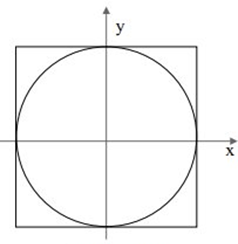

Sabemos que a área da circunferêcia de raio $r$ é dado por $A_c=\pi r^2$ e que a área do quadrado de lado $l$ é $A_q=l^2$. A razão entre as duas áreas é:

$$\frac{A_c}{A_q}=\frac{\pi r^2}{l^2}=\frac{\pi}{4}$$

Logo, podemos escrever:

$$\pi=\frac{4A_c}{A_q}$$

Assim, se sortearmos aleatoriamente $n$ pontos no interior do quadrado e contarmos a quantidade de vezes que esses pontos também estão no interior da circunferência, podemos aproximar $\pi$ como:

$$\pi=\frac{\text{Número de pontos dentro da circunferência}}{\text{Número de pontos sorteados}}$$

Elabore um programa em Python para estimar o valor de $\pi$ usando o Método da Circunferência.

*Sugestão:* Use a função `uniform` do módulo `random` para o sorteio dos pontos no interior do quadrado.

In [13]:
# Exercício 05 - Versão 01
from random import uniform

N = int(input('Digite o número de pontos para o Método da Circunferência: '))
pts_circ = 0

for i in range(N):
    x = uniform(-1, 1)
    y = uniform(-1, 1)
    if (x**2 + y**2) <= 1:
        pts_circ += 1

print(f'O valor aproximado de pi é {4*pts_circ/N}')

O valor aproximado de pi é 3.145


In [ ]:
# Exercício 05 - Versão 02 - Gráfica (opcional)